### Домашнее задание №1

В этом домашнем задании вам предлагается обучить модель регрессии для предсказания стоимости автомобилей, а также реализовать веб-сервис для применения построенной модели на новых данных.

> Оценка за домашку = min(ваш балл, 10)


Задания, <font color='#9933CC'>выделенные фиолетовым</font>, требуют от вас написания кода.

А вопросы, <font color='#FF6600'>выделенные оранжевым</font>, текстового ответа.

Оцениваются как код, так и ответы на вопросы. Если нет одного и/или другого, то часть баллов за соответствующее задание без колебаний снимается.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import seaborn as sns

random.seed(42)
np.random.seed(42)

Ниже ответьте на вопрос <font color='#FF6600'>
"Для чего фиксируем сиды в домашках?"</font>

In [2]:
print("Для воспроизводимости вычислений")

Для воспроизводимости вычислений


# Часть 1 (2.5 балла + 0.75) | EDA

## Простейший EDA и обработка признаков (1.5 балла + 0.25)

In [3]:
df_train = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_train.csv')
df_test = pd.read_csv('https://raw.githubusercontent.com/Murcha1990/MLDS_ML_2022/main/Hometasks/HT1/cars_test.csv')

print("Train data shape:", df_train.shape)
print("Test data shape: ", df_test.shape)

Train data shape: (6999, 13)
Test data shape:  (1000, 13)


(0.15 балла) <font color='#9933CC'>Отобразите 10 **случайных** строк тренировочного датасета</font>

In [4]:
df_train.sample(10)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
6565,Renault KWID Climber 1.0 MT BSIV,2019,300000,35000,Petrol,Individual,Manual,First Owner,23.01 kmpl,999 CC,67 bhp,91Nm@ 4250rpm,5.0
2943,Maruti Wagon R LXI,2013,225000,58343,Petrol,Trustmark Dealer,Manual,First Owner,21.79 kmpl,998 CC,67.05 bhp,90Nm@ 3500rpm,5.0
2024,Hyundai i20 Asta 1.2,2013,360000,30000,Petrol,Individual,Manual,First Owner,18.5 kmpl,1197 CC,82.85 bhp,113.7Nm@ 4000rpm,5.0
263,Hyundai i20 1.2 Asta,2010,300000,70000,Petrol,Individual,Manual,First Owner,17.0 kmpl,1197 CC,80 bhp,"11.4 kgm at 4,000 rpm",5.0
4586,Skoda Octavia L and K 1.9 TDI MT,2005,250000,120000,Diesel,Individual,Manual,Third Owner,16.4 kmpl,1896 CC,90 bhp,"21.4@ 1,900(kgm@ rpm)",5.0
4479,Maruti Ciaz ZXi,2016,700000,20000,Petrol,Individual,Manual,First Owner,20.73 kmpl,1373 CC,91.1 bhp,130Nm@ 4000rpm,5.0
4881,Hyundai Grand i10 1.2 Kappa Magna BSIV,2017,445000,27000,Petrol,Individual,Manual,First Owner,18.9 kmpl,1197 CC,81.86 bhp,113.75nm@ 4000rpm,5.0
3583,Ford Ecosport 1.5 DV5 MT Trend,2016,515000,68609,Diesel,Dealer,Manual,First Owner,22.7 kmpl,1498 CC,89.84 bhp,204Nm@ 2000-2750rpm,5.0
6361,Hyundai Verna 1.4 VTVT,2014,500000,33400,Petrol,Individual,Manual,First Owner,17.43 kmpl,1396 CC,105.5 bhp,135.3Nm@ 5000rpm,5.0
4108,Hyundai i20 Era 1.2,2015,490000,45900,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0


(0.1 балла) <font color='#9933CC'>Отобразите первые 5 и последние 5 объектов тестового датасета</font>

In [5]:
display(df_test.head(5))
display(df_test.tail(5))

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
0,Mahindra Xylo E4 BS IV,2010,229999,168000,Diesel,Individual,Manual,First Owner,14.0 kmpl,2498 CC,112 bhp,260 Nm at 1800-2200 rpm,7.0
1,Tata Nexon 1.5 Revotorq XE,2017,665000,25000,Diesel,Individual,Manual,First Owner,21.5 kmpl,1497 CC,108.5 bhp,260Nm@ 1500-2750rpm,5.0
2,Honda Civic 1.8 S AT,2007,175000,218463,Petrol,Individual,Automatic,First Owner,12.9 kmpl,1799 CC,130 bhp,172Nm@ 4300rpm,5.0
3,Honda City i DTEC VX,2015,635000,173000,Diesel,Individual,Manual,First Owner,25.1 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0
4,Tata Indica Vista Aura 1.2 Safire BSIV,2011,130000,70000,Petrol,Individual,Manual,Second Owner,16.5 kmpl,1172 CC,65 bhp,96 Nm at 3000 rpm,5.0


,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
995,Hyundai i10 Magna 1.1L,2008,250000,100000,Petrol,Individual,Manual,Second Owner,19.81 kmpl,1086 CC,68.05 bhp,99.04Nm@ 4500rpm,5.0
996,Hyundai i20 2015-2017 Sportz 1.2,2017,440000,50000,Petrol,Individual,Manual,Second Owner,18.6 kmpl,1197 CC,81.83 bhp,114.7Nm@ 4000rpm,5.0
997,Hyundai i20 Era Diesel,2009,340000,40000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,22.4 kgm at 1750-2750rpm,5.0
998,Hyundai i10 Asta,2012,350000,25000,Petrol,Individual,Manual,First Owner,20.36 kmpl,1197 CC,78.9 bhp,111.8Nm@ 4000rpm,5.0
999,Honda City i DTec SV,2016,700000,110000,Diesel,Individual,Manual,First Owner,26.0 kmpl,1498 CC,98.6 bhp,200Nm@ 1750rpm,5.0


(0.1 балла) <font color='#9933CC'>Посчитайте основные статистики как по числовым, так и по категориальным столбцам для трейна и теста</font>. 
> Подсказка: ``.describe()`` с нужным(и) аргументом(-ами)



In [6]:
df_train.describe(include='object')

,name,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
count,6999,6999,6999,6999,6999,6797,6797,6803,6796
unique,1924,4,3,2,5,386,120,316,419
top,Maruti Swift Dzire VDI,Diesel,Individual,Manual,First Owner,18.9 kmpl,1248 CC,74 bhp,190Nm@ 2000rpm
freq,116,3793,5826,6095,4587,197,885,330,468


In [7]:
df_train.describe(exclude='object').round(2)

,year,selling_price,km_driven,seats
count,6999.00,6999.00,6999.00,6797.00
mean,2013.82,639515.20,69584.62,5.42
std,4.05,808941.91,57724.00,0.97
min,1983.00,29999.00,1.00,2.00
25%,2011.00,254999.00,35000.00,5.00
50%,2015.00,450000.00,60000.00,5.00
75%,2017.00,675000.00,97000.00,5.00
max,2020.00,10000000.00,2360457.00,14.00


(0.15 балла) <font color='#9933CC'>Посмотрите, есть ли в датасете пропуски.</font>

<font color='#FF6600'>Если есть, то в каких колонках?</font>

In [8]:
df_train.isna().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          202
engine           202
max_power        196
torque           203
seats            202
dtype: int64

(0.1 балла) <font color='#9933CC'>Посмотрите, есть ли в трейне объекты с одинаковым признаковым описанием</font> (целевую переменную следует исключить). Если есть, то сколько?

In [9]:
dup_index = df_train.drop('selling_price', axis=1).duplicated(keep = 'last')
print(f'В наборе данных {dup_index.sum()} объектов с одинаковым признаковым описанием')

В наборе данных 1159 объектов с одинаковым признаковым описанием


(0.15 балла) <font color='#9933CC'>Отобразите такие объекты</font>

In [10]:
df_train[dup_index]

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque,seats
22,Maruti Baleno Delta 1.2,2016,575000,45000,Petrol,Individual,Manual,First Owner,21.4 kmpl,1197 CC,83.1 bhp,115Nm@ 4000rpm,5.0
26,Maruti Omni E MPI STD BS IV,2018,254999,25000,Petrol,Individual,Manual,First Owner,16.8 kmpl,796 CC,34.2 bhp,59Nm@ 2500rpm,8.0
27,Maruti Vitara Brezza LDi Option,2017,670000,70000,Diesel,Individual,Manual,First Owner,24.3 kmpl,1248 CC,88.5 bhp,200Nm@ 1750rpm,5.0
28,Fiat Palio 1.2 ELX,2003,70000,50000,Petrol,Individual,Manual,Second Owner,NaN,NaN,NaN,NaN,NaN
29,Maruti Omni 8 Seater BSIV,2012,150000,35000,Petrol,Individual,Manual,Second Owner,14.0 kmpl,796 CC,35 bhp,6.1kgm@ 3000rpm,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6860,Renault Captur 1.5 Diesel RXT,2018,1265000,12000,Diesel,Individual,Manual,First Owner,20.37 kmpl,1461 CC,108.45 bhp,240Nm@ 1750rpm,5.0
6861,Maruti Ciaz Alpha Diesel,2019,1025000,32000,Diesel,Individual,Manual,First Owner,28.09 kmpl,1248 CC,88.50 bhp,200Nm@ 1750rpm,5.0
6946,Chevrolet Spark 1.0 LS,2010,114999,60000,Petrol,Individual,Manual,Second Owner,18.0 kmpl,995 CC,62 bhp,90.3Nm@ 4200rpm,5.0
6981,Ford Freestyle Titanium Plus Diesel BSIV,2018,750000,24000,Diesel,Individual,Manual,First Owner,24.4 kmpl,1498 CC,98.63 bhp,215Nm@ 1750-3000rpm,5.0


(0.15 балла) <font color='#9933CC'>Удалите повторяющиеся строки</font>. Если при одинаковом признаковом описании цены на автомобили отличаются, то оставьте первую строку по этому автомобилю

In [11]:
df_train = df_train[~dup_index]

In [12]:
assert df_train.shape == (5840, 13)

(0.1 балла) Чтоб все было по красоте, <font color='#9933CC'>обновите индексы строк таким образом, чтобы они шли от 0 без пропусков</font>

In [13]:
df_train.reset_index(drop=True, inplace=True)

Вы могли заметить, что с признаками ``mileage, engine, max_power и torque`` всё не слава богу. Давайте починим.

(0.25 балла) Задача такая: 
<font color='#9933CC'>
* убрать единицы измерения для признаков ``mileage, engine, max_power``. 
* кастануть эти столбцы столбцы к ``float``.
* удалить столбец ``torque``
</font>

> Все действия нужно производить над обоими датасетами

---
**Доп (0.25 балла):**
* <font color='#9933CC'>Вместо удаления признак `torque` разделите на два: собственно `torque` и `max_torque_rpm`.</font> Учтите единицы измерения. Они разные ☹

In [14]:
df_train['max_power'] = df_train['max_power'].str\
                            .replace(' bhp', '')\
                            .replace('', np.nan)\
                            .astype(float)

df_test['max_power'] = df_test['max_power'].str\
                            .replace(' bhp', '')\
                            .replace('', np.nan)\
                            .astype(float)

In [15]:
df_train['engine'] = df_train['engine'].str\
                            .replace(' CC', '')\
                            .astype(float)

df_test['engine'] = df_test['engine'].str\
                            .replace(' CC', '')\
                            .astype(float)

In [16]:
def milage_convert(x):
    if type(x) == float:
        return x
    elif 'km/kg' in x:
        return float(x.replace('km/kg', '')) * 1.4
    else:
        return float(x.replace('kmpl', ''))
    
df_train['mileage'] = df_train['mileage'].apply(milage_convert)
df_test['mileage'] = df_test['mileage'].apply(milage_convert)

In [17]:
df_train.drop(['torque'], axis=1, inplace=True)

(0.15 балла) <font color='#9933CC'>Заполните пропуски в столбцах медианами. Убедитесь, что после заполнения пропусков не осталось</font>

> Обратите внимание, что, по уму, нужно посчитать медиану по трейну и этим средним заполнять пропуски в тесте. Так же делаем, если, например, стандартизируем признаки.



In [18]:
medians = df_train[['mileage', 'engine', 'max_power', 'seats']].median()

In [19]:
df_train.fillna(medians, inplace=True)
df_test.fillna(medians, inplace=True)


(0.1 балла) Теперь, когда не осталось пропусков, можно <font color='#9933CC'>преобразовать столбцы к более подходящим типам (``engnine`` и ``seats`` к int)
</font>

Ниже ответьте, <font color='#FF6600'>почему (хоть мы этого и не делаем) ``seats``, возможно, лучше сделать переменной категориальной, а не целочисленной.</font>

In [20]:
print(
'''
Каждый тип данных характеризуется множеством операций которые валидно над ним производить. 
В случае seats, множество операций применимых к признаку следующее: сравнение и упорядочивание.
Нет никакого смысла производить операции вычитания/сложений или умножения/деления над количеством сидений
=>  seats скорее ординальный признак, нежели числовой
'''
)


Каждый тип данных характеризуется множеством операций которые валидно над ним производить. 
В случае seats, множество операций применимых к признаку следующее: сравнение и упорядочивание.
Нет никакого смысла производить операции вычитания/сложений или умножения/деления над количеством сидений
=>  seats скорее ординальный признак, нежели числовой



In [21]:
df_train[['engine', 'seats']] = df_train[['engine', 'seats']].astype(int)
df_test[['engine', 'seats']] = df_test[['engine', 'seats']].astype(int)

## Визуализации (1 балл + 0.5)

Визуализировать нам надо не так уж и много. Во-первых, хотелось бы, в принципе, увидеть как распределены значения признаков. Также хотелось бы понять, насколько признаки скоррелированы между собой и с целевой переменной. А ещё неплохо бы посмотреть, не оказалось ли так, что тестовые данные распределены иначе, чем трейн.

Этим всем и предлагаем вам заняться.

(0.25 балла) <font color='#9933CC'>Посторойте попарные распределения всех числовых признаков для трейна.</font>

> ``sns.paiplot()`` позволяет сделать это в одну строчку

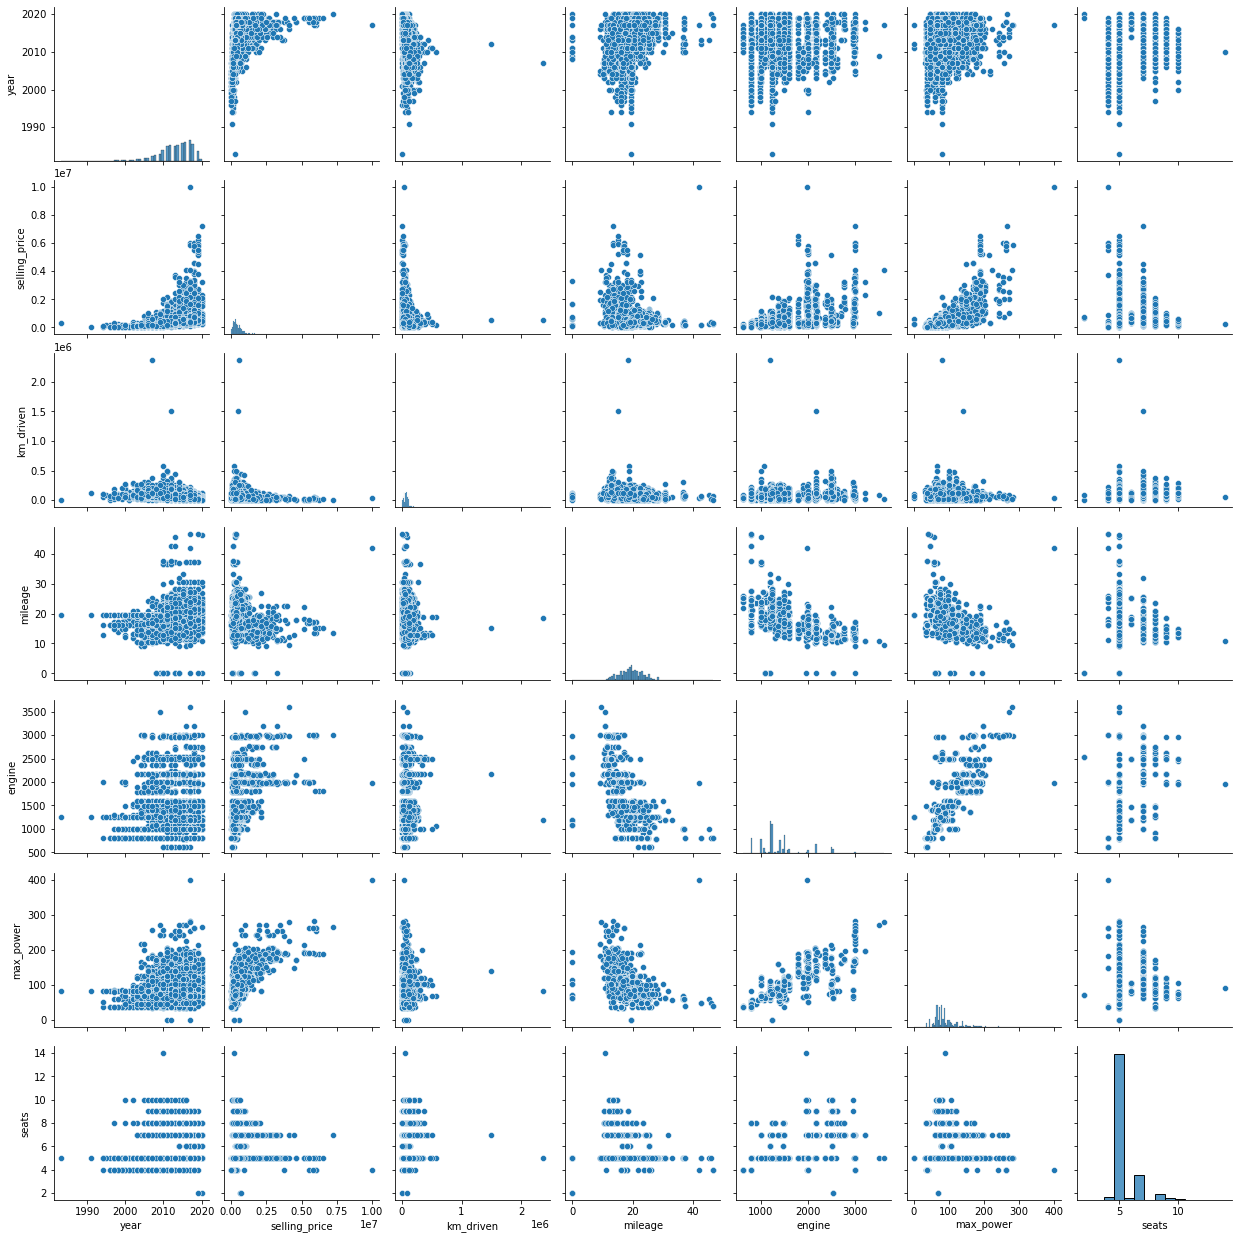

In [22]:
sns.pairplot(df_train)
plt.show()

Этот график не такой информативный, как можно было бы построить, беря признаки по отдельности. Но он позволяет сделать некоторые (возможно, далеко идущие) выводы. Впрочем, со многими из них (если не со всеми) вы бы справились умозрительно. Однако всегда приятно делать выводы, основываясь на данных.



* <font color='#FF6600'> Что можно сказать о связи предикторов с целевой переменной?
* А о корреляциях признаков? </font>

**Ответ:**
* Видно достаточно сильную положительную линейную связь между таргетом и `max_power`
* Так же наблюдается слабая положительная линейная связь между таргетом и `engine`
* `engine` и `max_power` положительно скоррелированы
* `engine` и `mileage` отрицательно скоррелированы

(0.25 балла) <font color='#9933CC'>Постройте pairplot по тестовым данным</font> и ответьте на вопрос <font color='#FF6600'>"Похожими ли оказались совокупности при разделении на трейн и тест?"</font>

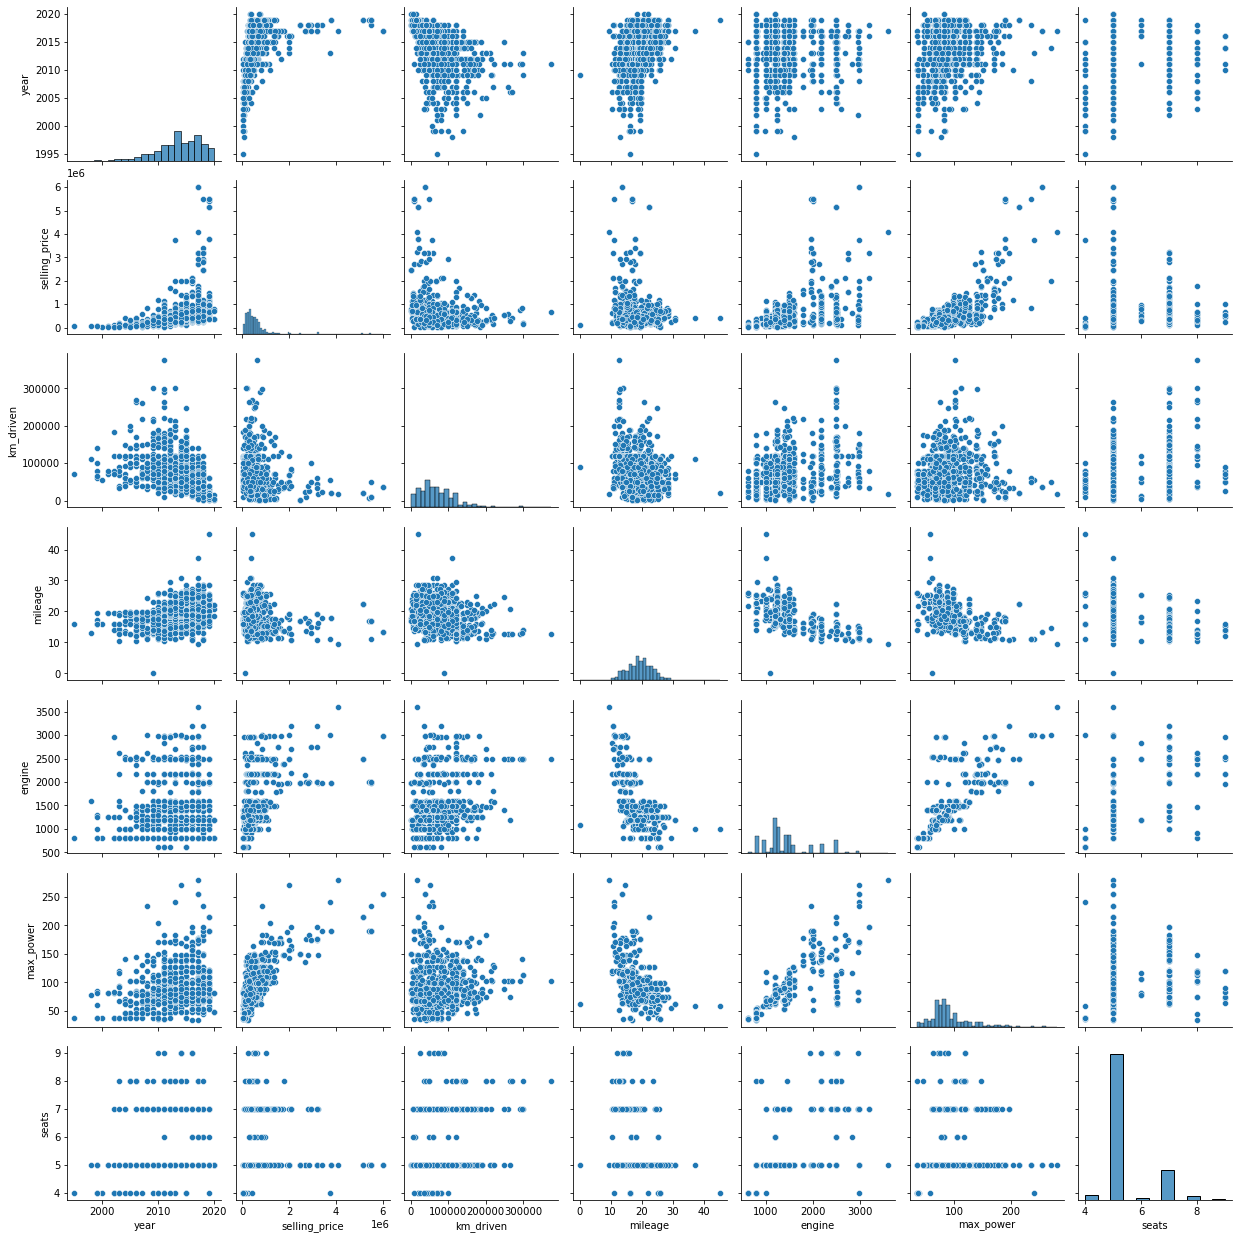

In [23]:
sns.pairplot(df_test)
plt.show()

**Ответ:**
* В целом сильных различий между распределениями признаков в трейне и тесте не видно. Разве что, похоже, что в `km_driven` в трейне есть сильные выбросы, скорее всего слеудет от них избавиться в будущем.

(0.25 балла) <font color='#9933CC'>Для трейна давайте построим тепловую карту (heatmap из библиотеки seaborn) попарных корреляций числовых колонок</font>

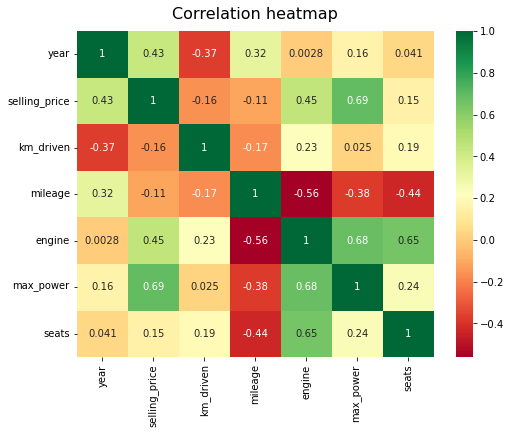

In [24]:
fig, ax = plt.subplots(figsize=(8, 6))
corr = df_train.corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', ax=ax)
plt.title('Correlation heatmap', size=16, pad=12)
plt.show()

Ответьте, пожалуйста, на вопросы: 
* <font color='#FF6600'>Какие 2 признака наименее скоррелированы между собой?</font>
* <font color='#FF6600'>Между какими наблюдается довольно сильная положительная линейная зависимость?</font>
* <font color='#FF6600'>Правильно ли, опираясь на данные, утверждать, что чем меньше год, тем, скорее всего, больше километров проехала машина к дате продажи.</font>

**Ответ:**
* `max_power` и `km_driven`, `year` и `engine` скоррелированы между собой меньше всего
* `selling_price` и `max_power`, `engine` и `max_power`, `engine` и `seats`, `engine` и `mileage` имеют довольно сильную линейную зависимость
* График зависимости и коэф. корреляции указывают на слабую отрицательную линейную зависимость между `year` и `km_driven`, что в свою очередь говорит в пользу правильности выдвинутого тезиса

(0.25 балла) <font color='#9933CC'> Отобразите диаграмму рассеяния для наиболее скореллированной пары **признаков** (на трейне) </font>

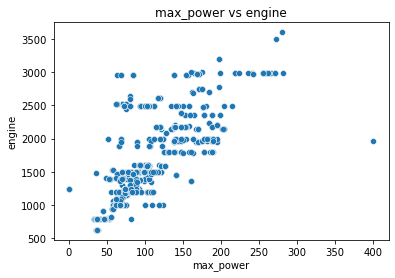

In [25]:
sns.scatterplot(x=df_train['max_power'], y=df_train['engine'])
plt.title('max_power vs engine')
plt.show()

### Дополнительные визуализации (бонус 0.5 балла)

Если вам кажется, что мы не попросили вас нарисовать какие-то очень важные зависимости, нарисуйте их и поясните.

max value:  2360457
median value:  61500.0


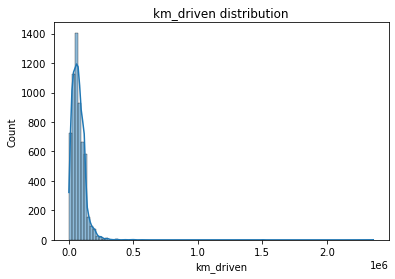

In [26]:
# Выбросы в km_driven
sns.histplot(df_train['km_driven'], kde=True, bins=100)
plt.title('km_driven distribution')

print('max value: ', df_train['km_driven'].max())
print('median value: ', df_test['km_driven'].median())

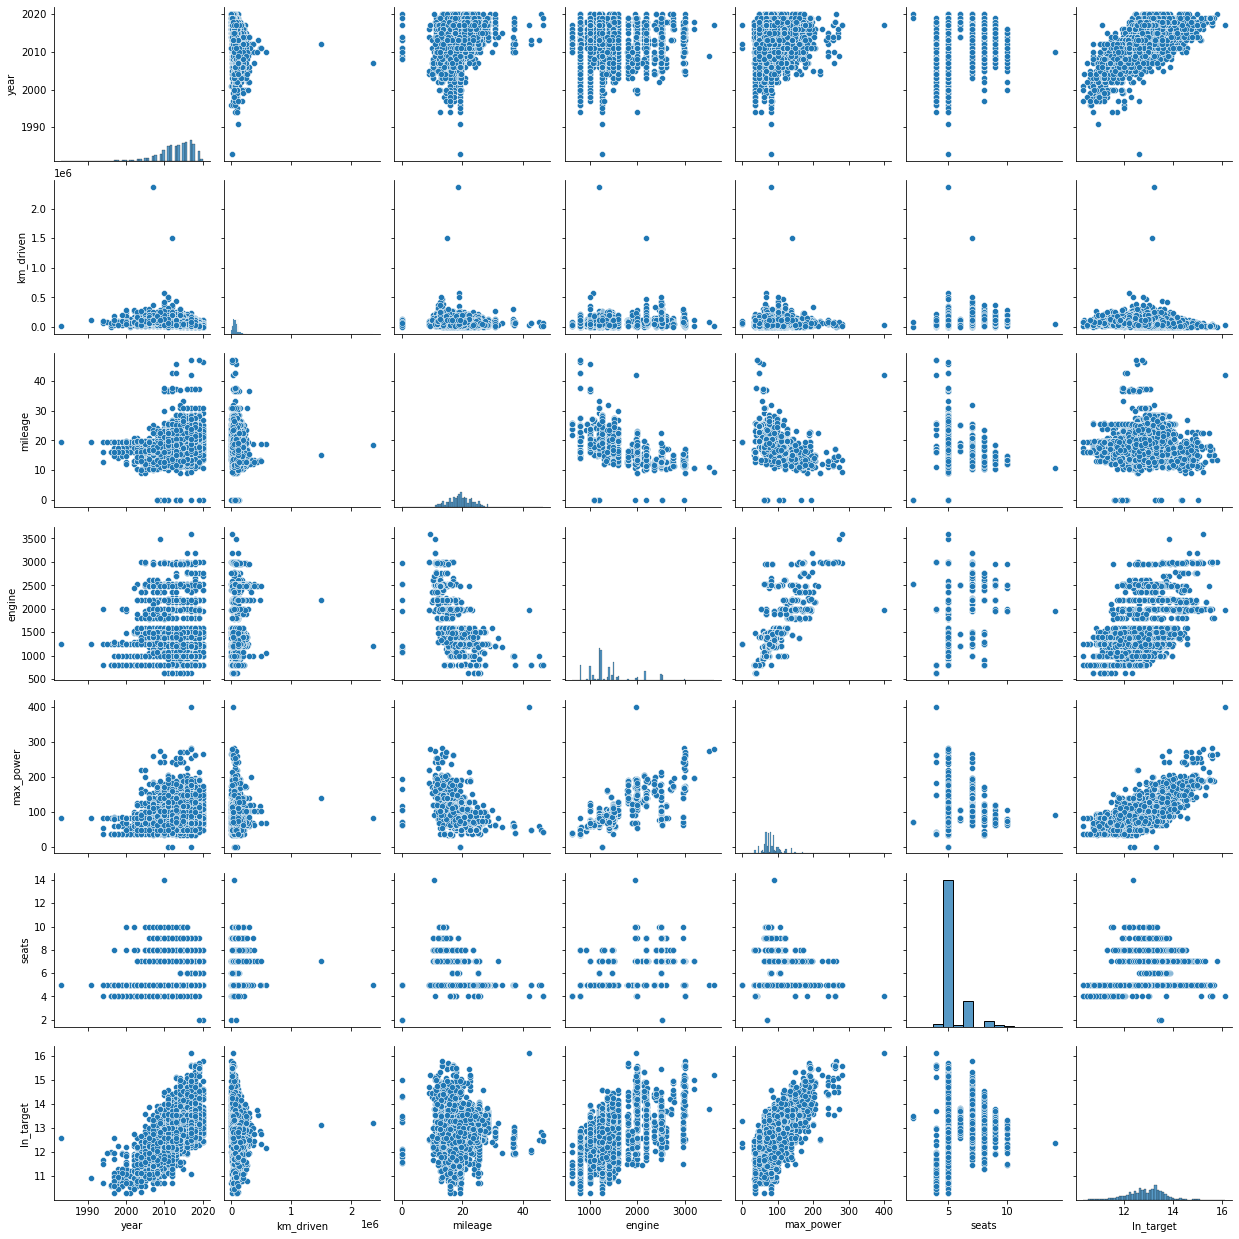

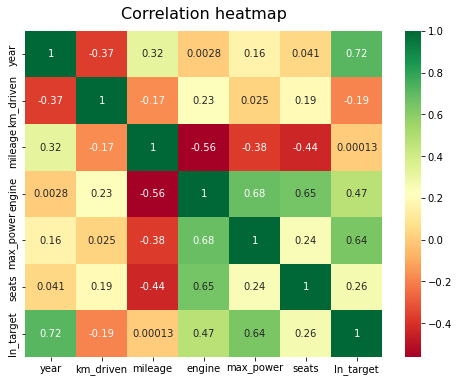

In [27]:
# Кажется следует логарифмировать таргет, тогда линейная связь со многими переменными усиливается

# Pairplot (log target)
df_train['ln_target'] = np.log(df_train['selling_price'])
sns.pairplot(df_train.drop('selling_price', axis=1))

# Corrplor (log_target)
fig, ax = plt.subplots(figsize=(8, 6))
corr = df_train.drop('selling_price', axis=1).corr()
sns.heatmap(corr, annot=True, cmap='RdYlGn', ax=ax)
plt.title('Correlation heatmap', size=16, pad=12)
plt.show()

# Удаляем логарифм таргета
df_train.drop('ln_target', axis=1, inplace=True)

# Часть 2 (1.25 балла) | Модель только на вещественных признаках

(0.05 балла) <font color='#9933CC'>В переменные ``y_train`` и ``y_test`` запишите значения целевых переменных. Столбцы ``selling_price`` из датафреймов необходимо удалить. Категориальные (все, кроме ``seats``) столбцы тоже.</font>

In [28]:
y_train = df_train['selling_price']
X_train = df_train.drop('selling_price', axis=1).select_dtypes(exclude='O')

In [29]:
assert X_train.shape == (5840, 6)

In [30]:
y_test = df_test['selling_price']
X_test = df_test.drop('selling_price', axis=1).select_dtypes(exclude='O')

In [31]:
assert X_test.shape == (1000, 6)

(0.2 балла) <font color='#9933CC'>Обучите классическую линейную регрессию с дефолтными параметрами. Посчтитайте $R^2$ и MSE для трейна и для теста</font>

**Замечание:** $R^2$ и MSE для трейна и для теста выводите везде, где требуется обучать модели, даже если в явном виде этого не просят. Иначе непонятно, как понять, насколько успешны наши эксперименты.

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error as MSE

simple_linreg = LinearRegression()
simple_linreg.fit(X_train, y_train)

y_pred = simple_linreg.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.5941532237923179
MSE:  483003.43288426107


Запомните правило:

> Использую линейную модель -- стандартизирую фичи

(0.25 балла) <font color='#9933CC'>Воспользуемся им</font>


In [33]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [34]:
simple_linreg.fit(X_train_scaled, y_train)

y_pred = simple_linreg.predict(X_test_scaled)
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.5941532237923315
MSE:  483003.432884253


Не очень результативно.

Зато уже сейчас можем интерпретировать модель. <font color='#FF6600'>"Какой признак оказался наиболее информативным в предсказании цены?"</font>

In [35]:
for col_name, coef in zip(X_train.columns, simple_linreg.coef_):
    print(col_name, 'coef : ', round(coef))

year coef :  153283
km_driven coef :  -44144
mileage coef :  28765
engine coef :  61113
max_power coef :  322593
seats coef :  -23593


Самым информативным, ожидаемо, оказался `max_power`

(0.25 балла) <font color='#9933CC'>Теперь попробуем Lasso-регрессию.</font> Здесь и дальше обучайте модели на нормализованных признаках

In [36]:
from sklearn.linear_model import Lasso

lasso_linreg = Lasso()
lasso_linreg.fit(X_train_scaled, y_train)

y_pred = lasso_linreg.predict(X_test_scaled)
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.5941520392288715
MSE:  483004.1377657917


In [37]:
for col_name, coef in zip(X_train.columns, lasso_linreg.coef_):
    print(col_name, 'coef : ', round(coef))

year coef :  153283
km_driven coef :  -44143
mileage coef :  28763
engine coef :  61108
max_power coef :  322594
seats coef :  -23590


<font color='#FF6600'>Занулила ли L1-регуляризация с параметрами по умолчанию какие-нибудь веса? Почему же?</font>

**Ответ:**
Нет, никакой из весов не ушел в ноль. Видимо так происходит из за стандартизации признаков, отчего модель не находит какой-либо из весов "слишком большим", чтобы занулять.

(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для Lasso-регрессии</font>

Вам пригодится класс [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).

In [38]:
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0.005, 0.01, 0.05, 0.1, 0.5, 0.9, 2, 5]}

grid = GridSearchCV(estimator=Lasso(), 
                    param_grid=params, 
                    cv=10,
                    verbose=True)

grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 8 candidates, totalling 80 fits


GridSearchCV(cv=10, estimator=Lasso(),
             param_grid={'alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 0.9, 2, 5]},
             verbose=True)

<font color='#FF6600'>Сколько грид-сёрчу пришлось обучать моделей?</font>

In [39]:
print(len(params['alpha']) * 10)

80


<font color='#FF6600'>Какой коэффициент регуляризации у лучшей из перебранных моделей? Занулились ли какие-нибудь из весов при такой регуляризации?</font>

In [40]:
# Коэффициент регуляризации у лучшей модели
grid.best_params_

{'alpha': 5}

In [41]:
# Веса лучшей модели (ни один не занулился)
for col_name, coef in zip(X_train.columns, grid.best_estimator_.coef_):
    print(col_name, 'coef : ', round(coef))

year coef :  153282
km_driven coef :  -44139
mileage coef :  28756
engine coef :  61089
max_power coef :  322597
seats coef :  -23579


In [42]:
y_pred = grid.best_estimator_.predict(X_test_scaled)
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.5941473204493231
MSE:  483006.9456934424


(0.25 балла) <font color='#9933CC'>Перебором по сетке (c 10-ю фолдами) подберите оптимальные параметры для [ElasticNet](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.ElasticNet.html)-регрессии</font>

In [43]:
from sklearn.linear_model import ElasticNet

params = {'alpha':[0.005, 0.01, 0.05, 0.1, 0.5, 0.9, 2, 5],
          'l1_ratio':[0.05, 0.1, 0.3, 0.5, 0.8, 1]}

grid = GridSearchCV(estimator=ElasticNet(), 
                    param_grid=params, 
                    cv=10,
                    verbose=True)

grid.fit(X_train_scaled, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits


GridSearchCV(cv=10, estimator=ElasticNet(),
             param_grid={'alpha': [0.005, 0.01, 0.05, 0.1, 0.5, 0.9, 2, 5],
                         'l1_ratio': [0.05, 0.1, 0.3, 0.5, 0.8, 1]},
             verbose=True)

<font color='#FF6600'>Какие гиперпараметры соответствуют лучшей из перебранных моделей?</font>

In [44]:
# Параметры лучшей модели
grid.best_params_

{'alpha': 0.9, 'l1_ratio': 0.8}

In [45]:
y_pred = grid.best_estimator_.predict(X_test_scaled)
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.555090048401953
MSE:  505714.29173622886


Предлагаем вам оставить вам попытки заметно улучшить качество модели регуляризацией и перейти к следующей части задания.

# Часть 3 (0.75 балла) | Добавляем категориальные фичи



(0 баллов) <font color='#9933CC'>Из ``df_train`` удалите столбцы с целевой переменной и названием автомобиля.</font>

In [46]:
X_train_cat = df_train.drop(['name', 'selling_price'], axis=1)

In [47]:
assert X_train_cat.shape == (5840, 10)

In [48]:
X_train_cat.describe(include='object')

,fuel,seller_type,transmission,owner
count,5840,5840,5840,5840
unique,4,3,2,5
top,Diesel,Individual,Manual,First Owner
freq,3177,5223,5336,3603


(0.5 балла) <font color='#9933CC'>Закодируйте категориалльные фичи и ``seats`` методом OneHot-кодирования</font>

> Обратите внимание, что во избежание мультиколлинеарности следует избавиться от одного из полученных столбцов при кодировании каждого признака методом OneHot. 

In [49]:
from sklearn.preprocessing import OneHotEncoder
X_train_cat = pd.get_dummies(X_train_cat, drop_first=True)

(0.25 балла) <font color='#9933CC'>Переберите параметр регуляризации `alpha` для гребневой (ridge) регрессии с помощью класса `GridSearchCV`.</font> В качестве параметров при объявлении GridSearchCV кроме модели укажите метрику качества $R^2$. Кроссвалидируйтесь по 10-ти фолдам.

<font color='#FF6600'>Удалось ли улучшить качество предсказаний?</font>

In [50]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

params = {'alpha':[0, 0.001, 0.5, 1, 5, 10, 100, 500, 5000]}

grid = GridSearchCV(estimator=Ridge(), 
                    param_grid=params, 
                    cv=10, 
                    scoring='r2', 
                    verbose=True)

grid.fit(X_train_cat, y_train)

Fitting 10 folds for each of 9 candidates, totalling 90 fits


GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': [0, 0.001, 0.5, 1, 5, 10, 100, 500, 5000]},
             scoring='r2', verbose=True)

In [51]:
grid.best_params_

{'alpha': 10}

# Часть 4 - бонусная (2 балла) | Feature Engineering 

В этой части домашнего задания вам предлагается проявить свою креативность для улучшения прогноза модели. Любые другие модели, кроме различных форм линейной (или полиномиальной) регресси, использовать запрещается. А значит, придется работать с признаками

**Что можно попробовать сделать?** (каждый пункт по 0.4 балла, но не больше 2-х баллов в сумме)

1.   *Сгенерировать новые признаки на основе уже существующих:*
    * посчитать произведения // частные признаков (кажется, что посчитать число "лошадей" на литр объема может быть полезно);
    * имеет смысл обратить внимание на визуализации в части с EDA (к примеру, зависимость цены от года выглядит квадратичной, а не линейной; значит, квадрат года нам, скорее всего, принесет больше пользы)

2.   *Добыть новые признаки:*
    * имеем название автомобиля, которое никак не используем (можно спарсить инфу о классе автомобиля или каких-то специфических опциях)
    * можно добавить пороговые признаки вроде "владелец третий или больше" и объединить признаки в некоторые осмысленные правила, например "первый или второй владелец и продавец официальный дилер" (подбирать пороги удобно по диаграммам рассеяния)

3.   *Поработать с уже имеющимися:*
    * далеко не факт, что заполнить пропуск медианой было лучшей идеей (как минимум, можно добавить dummy-столбец для модели, сигнализирующий, что раньше на месте медианы был пропуск -- там где он был, конечно); попробуйте другие способы филлинга;
    * мы не анализировали, есть ли в данных выбросы => никак выбросы не обрабатывали; наиболее простым и, тем не менее, довольно полезным вариантом нахождения выбросов могут послужить boxplot'ы для каждого столбца; что делать с выбросами думайте сами :) -- вариантов довольно много
    * мы толком не смотрели на таргет сам по себе; в нем тоже могут быть неожиданности -- стоит хотя бы проверить
    * можно заметить, что некоторые признаки распределены совсем не нормально; возможно их стоит отлогарифмировать

И так далее...

Feel Free to Try!

In [52]:
# Процессинг - энкодим категории и скейлим числовые признаки
num_features_train = df_train.select_dtypes(exclude = 'object').drop('selling_price', axis=1)
cat_features_train = df_train.select_dtypes(include = 'object').drop('name', axis=1)

num_features_test = df_test.select_dtypes(exclude = 'object').drop('selling_price', axis=1)
cat_features_test = df_test.select_dtypes(include = 'object').drop(['name', 'torque'], axis=1)

def preprocess(df_num, df_cat):
    scaler = StandardScaler().fit(num_features_train)
    ohe = OneHotEncoder(sparse=False, drop='first').fit(cat_features_train)
    tr_num = pd.DataFrame(scaler.transform(df_num), columns=df_num.columns)
    tr_cat = pd.DataFrame(ohe.transform(df_cat), columns=ohe.get_feature_names_out())
    
    return pd.merge(tr_num, tr_cat, left_index=True, right_index=True)

X_train = preprocess(num_features_train, cat_features_train)
X_test = preprocess(num_features_test, cat_features_test)

In [53]:
# Baseline
simple_linreg = LinearRegression()

simple_linreg.fit(X_train, y_train)
y_pred = simple_linreg.predict(X_test)
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.6193461956828079
MSE:  467772.03479251574


In [54]:
# Как было сказано при EDA, пробуем логорифмировать таргет 
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)

In [55]:
simple_linreg.fit(X_train, y_train_log)
y_pred = simple_linreg.predict(X_test)
print('R^2: ', r2_score(y_test_log, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.8707153112157937
MSE:  978066.1598390834


Видно существенный прирост в доле объясненной дисперсии. Попробуем произвести обратное логарифму действие с таргетом и посмотрим на метрики еще раз, чтобы MSE был сравним.

In [56]:
y_pred = np.exp(simple_linreg.predict(X_test))
print('R^2: ', r2_score(y_test, y_pred))
print('MSE: ', MSE(y_test, y_pred)**0.5)

R^2:  0.8223772776259741
MSE:  319534.99487666396


Как видим, MSE тоже значительно улучшилась.

# Часть Бизнесовая (0.5 балла)

Заказчик просил вас посчитать кастомную метрику -- среди всех предсказанных цен на авто посчитать долю предиктов, отличающихся от реальных цен на эти авто не более чем на 10% (в одну или другую сторону)

<font color='#9933CC'>Сделайте это самостоятельно для лучшей из своих моделей</font>

In [57]:
def business_metrics(y_true, y_pred):
    diff = abs(y_pred - y_true) / y_true
    return sum(diff < 0.1) / len(diff)

y_pred = np.exp(simple_linreg.predict(X_test))
business_metrics(y_test, y_pred)

0.271

# Часть 5 (3 балла) | Реализация сервиса на FastAPI

Cделайте с помощью FastAPI сервис, который с точки зрения пользователя реализует две функции:

1. на вход в формате json подаются признаки одного объекта, на выходе сервис выдает предсказанную стоимость машины
2. на вход подается csv-файл с признаками тестовых объектов, на выходе получаем файл с +1 столбцом - предсказаниями на этих объектах

С точки зрения реализации это означает следующее:
- средствами pydantic должен быть описан класс базового объекта
- класс с коллецией объектов
- метод post, который получает на вход один объект описанного класса
- метод post, который получает на вход коллекцию объектов описанного класса

Шаблон для сервисной части дан ниже. Код необходимо дополнить и оформить в виде отдельного .py-файла.

Протестируйте сервис на корректность работы и приложите скриншоты (см. ниже).

# Часть 6 (1 балл) | Оформление результатов

**Результаты вашей работы** необходимо разместить в своем Гитхабе. Под результатами понимаем следующее:
* ``.ipynb``-ноутбук со всеми проведёнными вами экспериментами (output'ы ячеек, разумеется, сохранить)
* ``.py``-файл с реализацией сервиса
* ``.pickle``-файл с сохранёнными весами модели, коэффициентами скейлинга и прочими числовыми значениями, которые могут понадобиться для инференса
* ``.md``-файл с выводами про проделанной вами работе:
    * что было сделано
    * с какими результатами
    * что дало наибольший буст в качестве
    * что сделать не вышло и почему (это нормально, даже хорошо😀)

**За что могут быть сняты баллы в этом пункте:**
* за отсутствие ``.pickle``-файла с весами использованной модели
* за недостаточную аналитику в ``.md``-файле
* за оформление и логику кода (в определённом смысле это тоже элемент оформления решения)

**Как будет выглядет проверка всего домашнего задания?**
1. Ассистент проходит по ссылке на (**открытый**) репозиторий из Энитаска
2. Смотрит ``readme.md``:
    * пожалуйста, приложите в него же скрины работы вашего сервиса -- собирать ваши проекты довольно времязатратно, но хочется убедиться, что всё работает
    * можете прислать screencast в ТГ
3. Просматривает ноутбук с pure-DS частью
4. Заглядывает в код сервиса
5. Хвалит

# Часть Благодарственная

Надеемся, вы честно проделали все пункты, а не просто пролистали досюда. Потому что здесь награда за старания. Пожалуйста, не стоит награждать себя до того, как закончите работать над домашкой.

https://drive.google.com/file/d/1LT06nyg9QgVi3r-D5BY-_mQ9TcJQFxJN/view?usp=share_link